# Welcome to Mines Computer Vision NumPy Tutorial!

In this tutorial, we will familiarize ourselves with the NumPy library so that we can use it for future assignments. This tutorial has many small interactive examples to help us grasp the material.

We will also spend some time on basic image handling and end with a few practice exercises. Use the left "Table of Contents" pane to navigate to relevant sections.

Make a copy of this file before starting to ensure that your changes will be saved (File --> Save a copy in Drive).

---



# First time working with Colab? Read this!

## What is Colab?

Colab, or "Colaboratory", is a product from Google that allows you to write and execute Python interactively in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

## **Getting started**

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
print( f"Here are the seconds in a day: {seconds_in_a_day}" )


Here are the seconds in a day: 86400


To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". If it ran successfully, a green checkmark should appear to the left of the cell. Otherwise, you may encounter some error messages below the cell to indicate the issue.

To edit the code, just click the cell and start editing.

_Note:_ The "f" notation is a python [_Formatted String Literal_](https://docs.python.org/3/tutorial/inputoutput.html#tut-f-strings) or "f-string". It is a handy way to format a string by including variables inline.

Variables that you define in one cell can later be used in other cells because the memory state is maintained in the background of the notebook. For example:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
print( f"Here are the seconds in a week: {seconds_in_a_week}" )

Here are the seconds in a week: 604800


But, this background state coupled with the ability to execute any code cell in any order means that we must take care in our executions.

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks (.ipynb files) that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

# Python Reminder -- Scoping with Whitespace

A quick reminder that python doesn't require brackets to separate methods and classes; control flow is instead typically declared with indentation. The following code sample will not work due to the indentation error in the `if` statement code block.
```
x = 1
y = 2
if x < y:
x = 3 # indentation error!
```
But this one will work:
```
x = 1
y = 2
if x < y:
  x = 3 # Fixed by adding whitespace!
```
Indentation level is (by convention) a tab, 2 spaces, or 4 spaces. We can debate about which is better, but all that really matters is that your choice is consistent.

#Overview -- NumPy's the Name, Quick Maths is the Game

NumPy makes manipulating matrices and vectors in Python easier and faster than ever! This is particularly useful for us, as images are represented by large matrices in visual computing.

→ For the remainder of this tutorial, you will be executing consecutive code blocks as described above and following the text. Run the block below to import `numpy` to begin.


In [ ]:
## run this cell before starting!
import numpy as np

# Arrays and their Basics

## Python Lists vs. NumPy Arrays

On the surface, these two data structures may look similar, but have several key differences!

| Python List     | NumPy Array |
| ----------- | ----------- |
| Can contain multiple data types      | All elements must be the same type       |
| Do not need pre-allocation   | Must be pre-allocated        |
|Cannot use linear algebra operations (e.g. vector/matrix multiplication)|**CAN** use linear algebra operations (e.g. vector/matrix multiplication)|


*Note: you can easily convert from Python Lists to NumPy arrays and vice versa, but it is NOT recommended due to high computational overhead.*

## Indexing

This is very similar to Python List Indexing.

To access or modify the first element of an array, the element at position 0 in the array is called. To see how this works, try the following exercise.


In [ ]:
a = np.arange(1, 6)
print(a)

# Add your code here!

[1 2 3 4 5]


You may notice an unfamiliar function: `np.arange(low, high)`. It returns an array with evenly spaced intervals from `low` to `high` (not including `high`). Full documentation [here](https://numpy.org/doc/stable/reference/generated/numpy.arange.html).

→ TASK: Now, edit your code to print `a[0]` and re-execute: `1` is now printed. Now try modifying the first element of the array by setting its value to `5`.

 Add `a[0] = 5` to your code and re-run the cell. The value of the array should now be `[5,2,3,4,5]`.

## Multi-dimensional Arrays/Matrices

The above example illustrates a 1-dimensional array, but in computer vision we will mostly be using 2D and 3D arrays to represent images, so it is important to understand how multi-dimensional (AKA N-dimensional) arrays work.

Multidimensional arrays in numpy are an extension of the two-dimensional matrix. One of the most common usages of multi-dimensional arrays in computer vision is to represent images with multiple channels. For instance, an RGB image has three channels (Red, Green, and Blue), and can be represented as a 3D array. Each of these channels can be accessed independently.

→ To become familiar with these concepts, let us create an RGB image. We begin by creating a 300 x 400 x 3 array and initialize it with zeros. This can be done as follows:

In [ ]:
image = np.zeros((300, 400, 3))

Now, we assign a mid-red (half-red) to the first hundred columns and a bright red (full-red) to the following hundred columns:

In [ ]:
image[:,0:100,0] = 0.5 # 'half' red
image[:,100:200,0] = 1 # 'full' red

Please take a moment to understand this indexing notation.

The single colon `:` indexes all elements in a particular dimension, while a colon accompanied by at least one number represents a range. In the first line of the cell above, in the second dimension, we have `0:100` or [0, 100). This can be equivalently expressed as `:100`. Likewise, if we wanted to get pixels from 100 to 400, we could write `100:` since 400 is the upper bound of our second dimension.

 Finally, we can assign green randomly to the first 100 rows:

In [ ]:
image[0:100,:,2] = np.random.randint(2, size=(100,400))
# choose random integer in range [0,2)

We can view the image using the code below! (Make sure you've run all the previous cell blocks!)

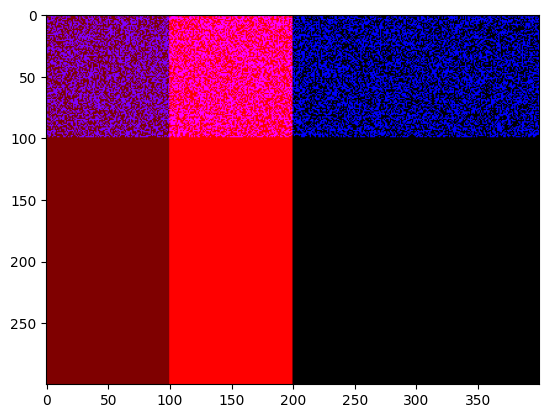

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.show()

Yay!! We've successfully manipulated an image with multiple channels! Does this match your expectations? If not, experiment with the above code to try variations that might help you gain insight, and ask questions on Ed or at Office Hours.

#**Helpful NumPy Functions**

Now that we have a grasp on how images are represented, we can learn some NumPy functions that may *(will)* be useful for future assignments!

## 1. `np.array(arg)`

This function creates an array. Note, NumPy arrays must be initialized!
Official documentation can be found [here](https://numpy.org/doc/stable/reference/generated/numpy.array.html).

In [ ]:
np.array([[1, 2, 3, 4],
          [5, 6, 7, 8]])

## run the cell to see the output

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

## 2. `np.zeros(shape)`

Returns a new array of the given shape, filled with zeros.

Documentation found [here](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html).

In [ ]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
np.zeros((2,3)) # we can make multi-dimensional arrays this way!

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
np.zeros((2,3), dtype=np.uint8)

array([[0, 0, 0],
       [0, 0, 0]], dtype=uint8)

## 3. `np.shape(arr)`

Returns the shape of the array. (Very useful for debugging future assignments)

Documentation found [here](https://numpy.org/doc/stable/reference/generated/numpy.shape.html).

In [ ]:
a = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8]])

np.shape(a)

(2, 4)

##4. `np.transpose(arr)`

Returns an array with axes transposed.

* For a 1D array, returns unchanged view of original array
* To convert 1D array into a 2D column vector, you must add a dimension.
* For an n-D array, if axes are given, their order indicates how the matrix is permuted.

Documentation found [here](https://numpy.org/doc/stable/reference/generated/numpy.transpose.html).

In [ ]:
a = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8]])

np.transpose(a)

# You can also write it as follows:
# a.T

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

In [ ]:
a = np.zeros((1,3))
print("Original:")
print(a)
print("Transposed:")
np.transpose(a, axes=(1, 0))
# feel free to play with the axes to see what the matrix looks like!

Original:
[[0. 0. 0.]]
Transposed:


array([[0.],
       [0.],
       [0.]])

## 5. `np.sum(arr, axis)`

Sums together all the elements in the array in a given axis. **If no axis is given, the entire array is summed.**

If the array consists of booleans, returns the number of "Trues" in the array.

Documentation is [here](https://numpy.org/doc/stable/reference/generated/numpy.sum.html).

In [ ]:
a = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8]])

np.sum(a)
# Challenge: Try adding and toggling axes to see what the result looks like!

36

## 6. Arithmetic Operations

+, -, /, * are all used to compute elementwise operations between arrays

In [ ]:
m1 = np.array([3, 2, 5])
m2 = np.array([4, 5, 2])

print(f'element-wise sum: {m1 + m2}\n')
print(f'element-wise difference: {m1 - m2}\n')
print(f'element-wise multiplication: {m1 * m2}\n') ##NOT the same as matrix multiplication
print(f'element-wise division: {m1 / m2}\n')


element-wise sum: [7 7 7]

element-wise difference: [-1 -3  3]

element-wise multiplication: [12 10 10]

element-wise division: [0.75 0.4  2.5 ]



## 7. `np.concatenate(arr1, arr2, axis)`

Joins arrays along the specified axis. The axis determines which dimension the arrays are joined on.

Documentation found [here](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).

In [ ]:
m1 = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8]])

m2 = np.array([[5, 1, 3, 2],
               [8, 6, 9, 7]])

print(f' concatenation with axis = 0:\n {np.concatenate((m1, m2), axis = 0)}\n')
print(f' concatenation with axis = 1:\n {np.concatenate((m1, m2), axis = 1)}')


 concatenation with axis = 0:
 [[1 2 3 4]
 [5 6 7 8]
 [5 1 3 2]
 [8 6 9 7]]

 concatenation with axis = 1:
 [[1 2 3 4 5 1 3 2]
 [5 6 7 8 8 6 9 7]]


## 8. `np.expand_dims(arr, axis)`

Inserts a new axis at the specified axis position in the expanded array shape.

Documentation found [here](https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html).

In [ ]:
a = np.array([1, 2, 3])

print(f'original array shape: {a.shape}')

b = np.expand_dims(a, axis=0)

print(f'shape when expand_dims with axis=0: {b.shape}')

c = np.expand_dims(a, axis=1)

print(f'shape when expand_dims with axis=1: {c.shape}')

original array shape: (3,)
shape when expand_dims with axis=0: (1, 3)
shape when expand_dims with axis=1: (3, 1)


## 9. `np.matmul(arr1, arr2)`

Matrix multiplies two arrays. NOT DOT PRODUCT.

The trick with matmul is ensuring the matrix dimensions match. It won't magically fix dimension mismatch. Explicitly, you may only multiply `arr1` and `arr2` if the shape of `arr1` is *m x n* and the shape of `arr2` is *n x p*, where *m* may or may not equal *p*.

Documentation is [here](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html).

In [ ]:
# Example 1 (Two 2D arrays)
arr1 = np.array([[1, 0],
              [0, 1]])
arr2 = np.array([[4, 1],
              [2, 2]])
np.matmul(arr1, arr2)

array([[4, 1],
       [2, 2]])

In [ ]:
# Example 2 (One 2D array and One 1D array)
arr1 = np.array([[1, 0],
              [0, 1]])
arr2 = np.array([1, 2])
np.matmul(arr1, arr2)

array([1, 2])

##10. `np.dot(a, b)`

Dot product of two arrays. Also known as the inner product.

Documentation is [here](https://numpy.org/doc/stable/reference/generated/numpy.dot.html).



In [ ]:
arr1 = np.array([[1, 0],
              [0, 1]])
arr2 = np.array([1, 2])
np.dot(arr1, arr2)

array([1, 2])

# The Need for Speed - NumPy Edition

Great! So now we know a handful of functions; we can move on to the more interesting stuff!

One of the many advantages of NumPy is its computational superiority to standard Python Loops! This is incredibly important for us, as images are represented by *large* matrices, and looping through each pixel of an image could take a REALLY long time (and we will be dealing with A LOT of images). Therefore, we want to reduce the number of loops we have in our code.



## Quick Maths
But how do we perform operations on each pixel if we shouldn't be looping through an image?

*So glad you asked!* To apply an operation to all elements of an array, just **apply the operation to the entire array at once**!

In [ ]:
A = np.array([[3, 6, 9], [1, 2, 4]])

## square all elements of array
print(np.square(A))       ## output: [[9 , 36, 81],
                          ##         [1 , 4 , 16]]

## add 3 to all elements in array
print(A + 3)              ## output: [[6 , 9 , 12],
                          ##         [4 , 5 , 7 ]]

## take sin of all elements in array
print(np.sin(A))          ## output: [[ 0.14112001, -0.2794155 ,  0.41211849],
                          ##         [ 0.84147098,  0.90929743, -0.7568025 ]]

[[ 9 36 81]
 [ 1  4 16]]
[[ 6  9 12]
 [ 4  5  7]]
[[ 0.14112001 -0.2794155   0.41211849]
 [ 0.84147098  0.90929743 -0.7568025 ]]


Since NumPy is an extension for Python that is written in C, its operations are faster than their corresponding Python equivalents. As such, we recommend doing as much of your calculations in NumPy as possible. It is best to avoid using loops whenever possible. We can attain significant performance improvements through vectorization and logical indexing.

## Logical indexing

Suppose we have an `m` by `n` 2D array, and we want to set every element in the array that has a value greater than 100 to 255. This can be done as follows with a for loop:


Before!


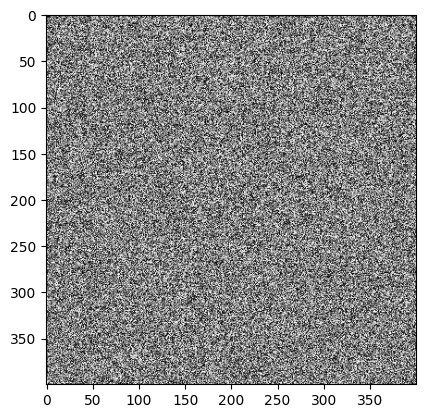

After!


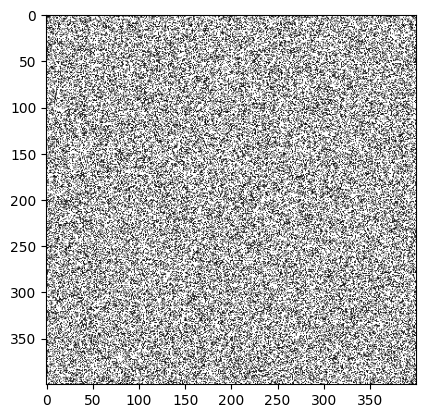

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

m = 400
n = 400
A = np.random.randint(255, size=(m,n))
# Let's see what the image looks like before the Transformation.
print("Before!")
plt.imshow(A, cmap='gray')
plt.show()

loop_start = time.time() # marking the start time
for i in range(m):
    for j in range(n):
        if A[i,j] > 100:
            A[i,j] = 255
loop_end = time.time()

# And After!
print("After!")
plt.imshow(A, cmap='gray')
plt.show()

**The more efficient way to do this uses logical indexing:**

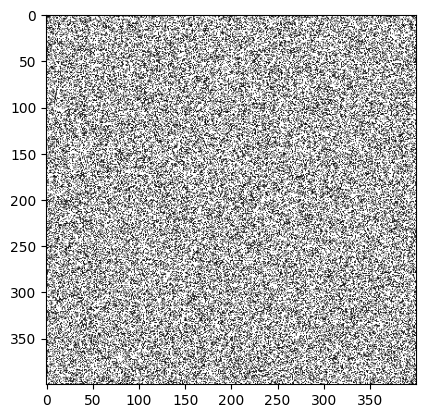

Total time for loop computation: 0.13365 seconds
Total time for logical indexing computation: 0.00208 seconds


In [ ]:
logic_start = time.time()
# Replace the double for loop with this:
A[A > 100] = 255
logic_end = time.time()

# Show the image to double check.
plt.imshow(A, cmap='gray')
plt.show()

# Compare the time of computation for logical indexing and loops
print('Total time for loop computation: {:.5f} seconds'.format(loop_end - loop_start))
print('Total time for logical indexing computation: {:.5f} seconds'.format(logic_end - logic_start))

Note the time difference between a loop and logical indexing. Even for a small image and a simple operation, the difference is huge!

B is now a binary logical array, where for all `i`,`j`, `B[i][j]=1` if and only if `A[i][j] > 100;` otherwise, `B[i][j]=0`. Then we do the following: `A[B] = 255`. An element-wise assignment is then performed; the result of A the same as it would be using the for loop method. A appears brighter, as more pixels are set to their maximum value.

*Note: Logical indexing also works across multi-channel images! Even though we can split out each of our color channels and index into them individually, we can also logically index directly into the three-channel RGB image.*

## Pre-allocation

Numpy does not support dynamic array allocation; it is necessary to allocate space for an array before making assignments. For example, suppose you want to create a 10 element array such that every element is the integer 5. This could be done as follows:

In [ ]:
a = np.zeros(10)
for i in range(10):
    a[i]=5

Array `a` must be initialized with 10 elements before we can change those elements. To increase the size of the array, we can use methods like `numpy.append()`.

In [ ]:
a = np.array([5]) # create an array that is too small...
for i in range(9):
    a = np.append(a, [5]) # ...that we resize every time - this is slow; pre-allocate where possible

However, when using resizing methods like append() instead of pre-allocation, elements need to be re-copied every time the size of the array is increased. For a small list like this, the impact is not noticeable, but for long lists it will quickly become a bottleneck. Thus, you should always pre-allocate where possible.

# Handling Images

We can use scikit-image to load images from disk. `skimage.io.imread` function is used to load images. The `matplotlib.pyplot.imshow` function takes in a NumPy array representation of an image as a parameter and displays the image.

Scikit-image documentation [here](https://scikit-image.org/docs/dev/api/skimage.html#skimage.img_as_float32).

## Mac-Users Beware: Matplotlib Errors on macOS

When dealing with `matplotlib`, an error you may run into is something like: `No module named '_tkinter'`. This seems to be an issue with the `matplotlib` module backend. If this happens, ensure that you include the following at the top of your Python code, when importing `matplotlib`.

In [ ]:
import matplotlib
# matplotlib.use("TkAgg") # Uncomment to run the virtual environment on MacOS. Otherwise, skip!
import matplotlib.pyplot as plt

## Color Images vs. Grayscale

Color images are often built of several stacked color channels, each of them representing value levels of the given channel. For example, RGB images are composed of three independent channels for red, green and blue primary color components. In contrast, a grayscale image (aka black and white image) is one in which the value of each pixel is a single sample, that is, it carries only intensity information.

In Python, it is easy to convert an RGB image to grayscale. This can be achieved using scikit-image's `rgb2gray` function.

We can also access individual color channels of a color image. This is illustrated in the code snippet below.

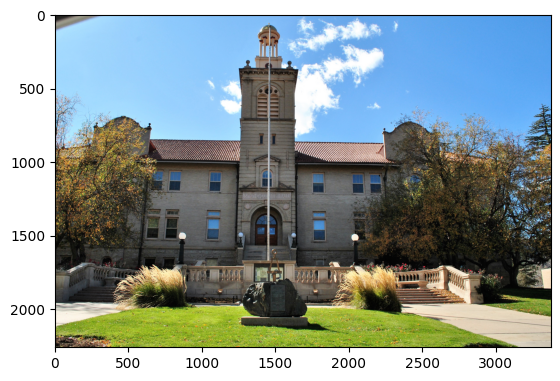

In [ ]:
# Read in original RGB image.
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt

# On the left panel, navigate to Files
# Upload an image of your choosing under the "content" folder
# Change the name of "yourimage.jpg" on the line below to match the name of your uploaded image
rgbImage = io.imread('yourimage.jpg')
(m,n,o) = rgbImage.shape

# Extract color channels.
redChannel = rgbImage[:,:,0] # Red channel
greenChannel = rgbImage[:,:,1] # Green channel
blueChannel = rgbImage[:,:,2] # Blue channel

# Create an all black channel.
allBlack = np.zeros((m, n), dtype=np.uint8)

# Create color versions of the individual color channels.
justRed = np.stack((redChannel, allBlack, allBlack), axis=2)
justGreen = np.stack((allBlack, greenChannel, allBlack),axis=2)
justBlue = np.stack((allBlack, allBlack, blueChannel),axis=2)

# Recombine the individual color channels to create the original RGB image again.
recombinedRGBImage = np.stack(( redChannel, greenChannel, blueChannel),axis=2)

# display the image
plt.imshow(recombinedRGBImage)
plt.show()

Try to view the various results using `imshow`. You may have to call `imshow(image)` first, followed by `show()`. See the above code block for an example.

# Types and Pixel Ranges

As aforementioned, there is no type-declaration in Python; the language handles this automatically. However, NumPy arrays do have [types](https://numpy.org/doc/stable/user/basics.types.html), and it is critical to understand how this works to use various image processing functions. Try downloading an image from the internet and reading it like so:


In [ ]:
from skimage import io
image = io.imread('yourimage.jpg')

The variable `image` now contains the color information of `yourimage.jpg` within a numpy array. If your chosen image has color, this array will be of size (height, width, 3), the 3 representing the 3 color channels. Try printing out one of the values in the array (ex: `print(image[200,35,1])`. You should notice that the values of the numpy array are integers from 0 to 255.

At times, you will want to alter the image in ways such that some of the entries become non-integer values, and thus you will want to convert the image to floating point format by using the numpy function. You might find it tempting to cast types using `astype`. However, `astype()` ([Documentation](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html) ) violates typical assumptions made in other functions about data type ranges, and this can lead to confusion when using built-in scikit-image processing functions.

For example, when using `matplotlib.pyplot.imshow`, Matplotlib assumes that the image pixel values are between 0 and 255 if the image is in integer format; if the image is in floating-point format, it is assumed that the pixel values are in between 0 and 1. Thus, as a general rule, when you convert an image to floating-point format, you should normalize the image so that all its entries are between 0 and 1; this helps prevent potential confusion.

This is easiest done by using particular scikit-image functions that will convert safely between datatypes: You can use `img_as_float32` to go from 8-bit unsigned byte [0,255] to 32-bit floating point [0,1]. This function converts an array to floating-point format and then normalizes the array so that all of its values are between 0 and 1. Or, use `img_as_ubyte` to convert from a floating point [0,1] image back to an 8-bit unsigned byte [0,255].

You can read more about image data types and what they mean in the official [documentation](https://scikit-image.org/docs/dev/user_guide/data_types.html).

To illustrate these concepts, try using these functions yourself. First, try to cast the image that you read from a file to floating-point format using `astype()` and displaying it as follows:


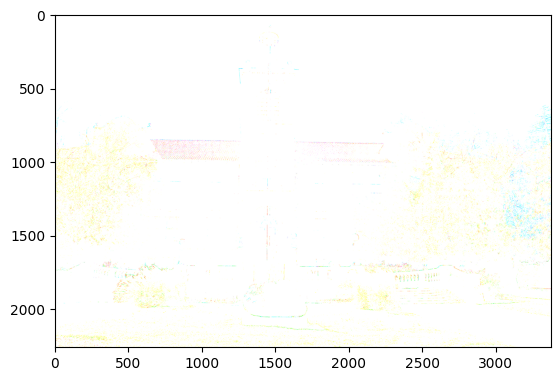

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

image = io.imread('yourimage.jpg')
image = image.astype(np.float32)

plt.imshow(image)
plt.show()

The displayed image should look very strange; it should hardly resemble an image. This is because it has not been normalized into the [0,1] range, and because `plt.imshow()` assumes that floating point data types have their minimum brightness at 0 and their maximum brightness at 1 for its display. Now, try converting the image to floating-point format and normalize it from 0 to 1; then display the image:

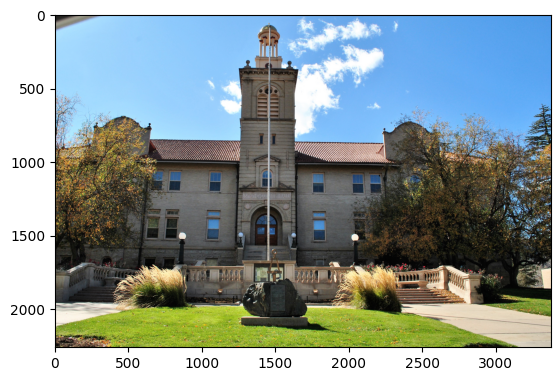

In [ ]:
from skimage import img_as_float32
from skimage import io
import matplotlib.pyplot as plt

image = io.imread('yourimage.jpg')
floatImage = img_as_float32(image)

plt.imshow(floatImage)
plt.show()

The displayed image should now look normal. Also, note that if you examine any of the entries in the `floatImage` array, you should find that all entries have values between 0 and 1.

If ever you want to know the type of a numpy array, you can look at the dtype variable of the array, e.g., `print(a.dtype)`.

Note: The `img_as_float` function will covert an image to a double-wide 64-bit floating point number (also called a float64). This will provide more precision for operations, but be slower. Generally, as our input image is from a lower bit depth (8 bit), a 32-bit float is sufficient for image manipulation. scikit-image provides the function `img_as_float32` to convert to the more efficient single-wide 32-bit floating point number (float32) format.

# Acknowledgements

This Colab was written by past TAs for Brown CSCI 1430 course.

# PRACTICE EXERCISES

1) Calculate the mean value of the elements in arr




In [ ]:
arr = np.array([[1, 2, 3],
                [7, 8, 9],
                [2, 7, 3]])

## your code here

## If you have time, can you find a way to do this in one line?
## What about with one function?

2) Create a 5x1 array where each element corresponds to the sum of the elements in that row of arr



In [ ]:
arr = np.array([[5, 6, 2, 5],
                [4, 5, 2, 5],
                [6, 7, 2, 5],
                [6, 8, 9, 1],
                [10, 41, 5, 0]])

## your code here

3) Replace all even numbers in arr with 0

In [ ]:
arr = np.array([1, 4, 7, 8, 2, 5, 8, 1, 5, 7, 8, 9])

## your code here

4) Turn the following for loops into a numpy function

In [ ]:
arr = np.array([[8, 1, 4], [6, 2, 8]])

## change the code below
for x in range(2):
  for y in range(3):
    if arr[x,y] == 8:
      arr[x,y] = 0

print(arr)

[[0 1 4]
 [6 2 0]]


5) Create an array where each row consists of [age, height, hours] in that order. Assume these arrays are already sorted, so that all the elements found at index 0 belong together.

In [ ]:
age = np.array([[14],
                [52],
                [24],
                [63],
                [23]])
height = np.array([[61],
                   [63],
                   [70],
                   [74],
                   [59]])
hours = np.array([[3, 2, 4, 5, 6]])

## your code here


## hint: your output should look like this
## array([[14, 61,  3],
##        [52, 63,  2],
##        [24, 70,  4],
##        [63, 74,  5],
##        [23, 59,  6]])

6) Change the following for loops into a numpy statement

In [ ]:
arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

## change the code below
for x in range(arr.shape[0]):
  for y in range(arr.shape[1]):
    if x == 0:
      arr[x,y] = arr[x,y] * 2
    elif x == 1:
      arr[x,y] = arr[x,y] * 3
    elif x == 2:
      arr[x,y] = arr[x,y] * 4

print(arr)


[[ 2  4  6]
 [12 15 18]
 [28 32 36]]


7) Multiply m1 and m2 transpose together elementwise. Multiply m1 and m2 together using matrix multiplication

In [ ]:
m1 = np.array([[4, 5, 2, 1],
               [6, 8, 2, 1],
               [1, 7, 9, 12]])

m2 = np.array([[15, 2, 31],
               [5, 12, 52],
               [62, 13, 4],
               [14, 2, 14]])

##np.matmul() or np.dot() might be helpful!
## your code here

8) You have an array of names and a corresponding array of hours worked this week. Find the name of the person who worked the highest total hours this week using numpy functions.

In [ ]:
people = np.array(['alice','bob', 'cindy', 'david', 'elyse'])

hours = np.array([[8, 3, 6, 6, 7],
                  [6, 8, 2, 1, 4],
                  [9, 6, 8, 7, 1],
                  [10, 3, 1, 1, 1],
                  [6, 7, 2, 3, 6]])

## for clarification, this means that alice worked 8 + 3 + 6 + 6 + 7 total hours this week

## np.argmax() may be a useful function!
## your code here

9) Take the situation from 8, and now assume people are paid \$11 for the first day they work, \$12 for the second day they work, \$13 for the third day they work, \$14 for the fourth day and \$15 for the 5th day

Find the name of the person who earned the most money using numpy functions

In [ ]:
people = np.array(['alice','bob', 'cindy', 'david', 'elyse'])

hours = np.array([[8, 3, 6, 6, 7],
                  [6, 8, 2, 1, 4],
                  [9, 6, 8, 7, 1],
                  [10, 3, 1, 1, 1],
                  [6, 7, 2, 3, 6]])

daily_pay = np.array([11, 12, 13, 14, 15])

## your code here

10) Using m1 and m2 (you are not allowed to hard-code the final array) create the pattern shown below

In [ ]:
m1 = np.array([0, 1, 0, 1, 0, 1])
m2 = np.array([3, 0, 3, 0, 3, 0])


## final pattern:
# array([[0, 1, 0, 1, 0, 1, 3],
#        [3, 0, 3, 0, 3, 0, 1],
#        [3, 1, 3, 1, 3, 1, 3],
#        [3, 0, 3, 0, 3, 0, 1],
#        [0, 1, 0, 1, 0, 1, 3],
#        [3, 1, 3, 1, 3, 1, 1]])


## your code here